## Colorado Crime Data: Logistic, Lasso and Ridge Regressions:

> This dataset is from the same FBI site where the New York Crime data was taken from and represents the same data from Colorado.  Below, we investigate how Logistic, Lasso and Ridge Regressions work with the data.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [52]:
col_list = ['Population', 'Violent_Crime', 'Murder', 'Rape', 'Rape_2', 'Robbery', 
            'Assault', 'Property_Crime', 'Burglary', 'Larceny', 'MV_Theft', 'Arson']

data = pd.read_excel('Colorado_2013_Crime.xls', names = col_list, header = 3, 
                     index_col = 0, skiprows = [0], skipfooter = 2).drop('Rape_2', 1)

In [53]:
# A bit of feature engineering:

# Making a Binary Violent Crime Column:
data.loc[data['Violent_Crime'] == 0, 'Binary_Violent_Crime'] = 0
data.loc[data['Violent_Crime'] > 0, 'Binary_Violent_Crime'] = 1

#Same for Murder, Rape, Property_Crime and Larceny:
data.loc[data['Arson'] <= 2, 'Binary_Arson'] = 0
data.loc[data['Arson'] > 2, 'Binary_Arson'] = 1

data.loc[data['Murder'] == 0, 'Binary_Murder'] = 0
data.loc[data['Murder'] > 0, 'Binary_Murder'] = 1

data.loc[data['Rape'] == 0, 'Binary_Rape'] = 0
data.loc[data['Rape'] > 0, 'Binary_Rape'] = 1

data.loc[data['Property_Crime'] == 0, 'Binary_Property_Crime'] = 0
data.loc[data['Property_Crime'] > 0, 'Binary_Property_Crime'] = 1

In [54]:
# Doing non-binary feature engineering:

data['Larceny/Violent_Crime'] = data.Larceny / data.Violent_Crime
data['Property_Crime/Rape'] = data.Property_Crime / data.Rape

In [55]:
# Removing NaN and Inf values:

data.loc[data['Larceny/Violent_Crime'] == np.inf] = np.nan
data.loc[data['Property_Crime/Rape'] == np.inf] = np.nan
data = data.dropna(axis = 0, how = 'any')

### Variables and Models:

> After doing a bit of feature engineering, now we can start by defining our input data and our target variables - as well as defining and fitting our first models:

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

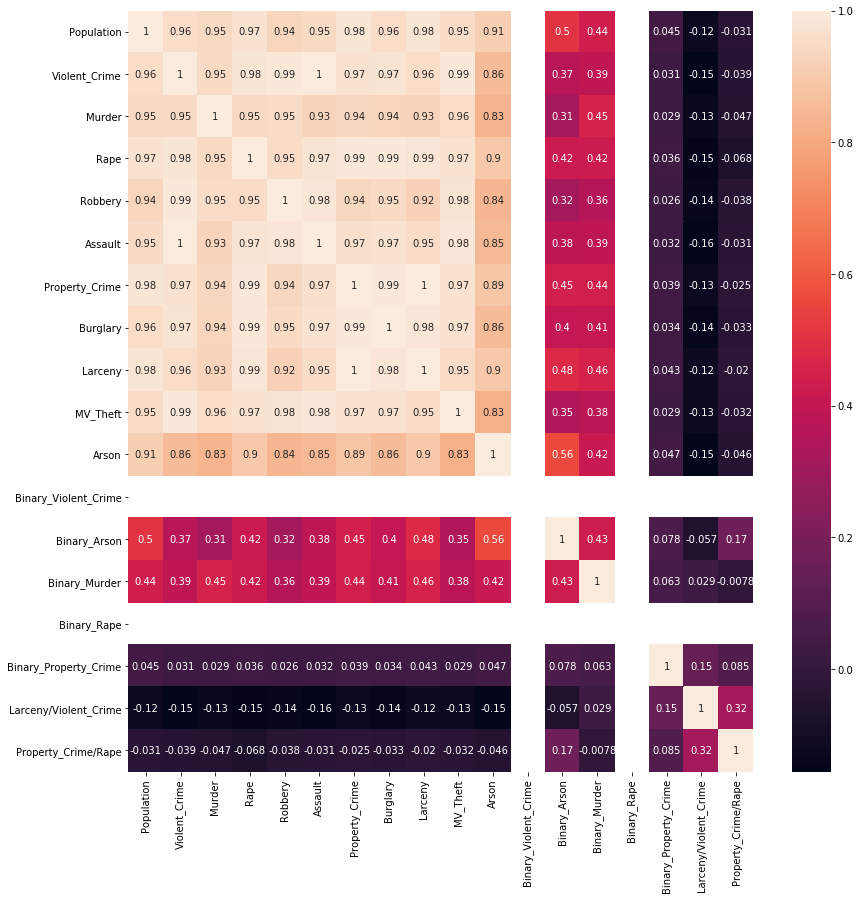

In [57]:
f, ax = plt.subplots(figsize = (14, 14))
plt.show(sns.heatmap(data.corr(), annot = True))

### Predicting Arson:

In [101]:
X = data.drop(['Arson', 'Binary_Arson'], 1)
y = data.Binary_Arson

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50)

In [105]:
X_train

,Population,Violent_Crime,Murder,Rape,Robbery,Assault,Property_Crime,Burglary,Larceny,MV_Theft,Binary_Violent_Crime,Binary_Murder,Binary_Rape,Binary_Property_Crime,Larceny/Violent_Crime,Property_Crime/Rape,Binary_Larceny
City,,,,,,,,,,,,,,,,,
Golden,19334.0,33.0,1.0,5.0,6.0,21.0,402.0,43.0,334.0,25.0,1.0,1.0,1.0,1.0,10.121212,80.400000,0.0
Wheat Ridge,30882.0,103.0,0.0,12.0,19.0,72.0,1128.0,179.0,806.0,143.0,1.0,0.0,1.0,1.0,7.825243,94.000000,1.0
Hotchkiss,917.0,2.0,0.0,1.0,0.0,1.0,21.0,3.0,13.0,5.0,1.0,0.0,1.0,1.0,6.500000,21.000000,0.0
Longmont,89434.0,226.0,0.0,76.0,19.0,131.0,2009.0,266.0,1634.0,109.0,1.0,0.0,1.0,1.0,7.230088,26.434211,1.0
La Veta,773.0,5.0,2.0,2.0,0.0,1.0,11.0,4.0,7.0,0.0,1.0,1.0,1.0,1.0,1.400000,5.500000,0.0
Lafayette,26145.0,50.0,0.0,12.0,5.0,33.0,449.0,58.0,374.0,17.0,1.0,0.0,1.0,1.0,7.480000,37.416667,0.0
Federal Heights,11894.0,55.0,0.0,17.0,8.0,30.0,628.0,81.0,476.0,71.0,1.0,0.0,1.0,1.0,8.654545,36.941176,1.0
Durango,17303.0,47.0,0.0,14.0,2.0,31.0,464.0,52.0,396.0,16.0,1.0,0.0,1.0,1.0,8.425532,33.142857,0.0
Leadville,2596.0,13.0,0.0,1.0,0.0,12.0,28.0,8.0,13.0,7.0,1.0,0.0,1.0,1.0,1.000000,28.000000,0.0


##### Logistic Regression:

In [106]:
# Setting the C value to a super high number in order to standardize this model to regular logistic regression:

log_regr1 = LogisticRegression(C=1e9, max_iter = 150)

log_regr1.fit(X_train, y_train)

y_pred = log_regr1.predict(X_test)

log_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])

log1_train_score = log_regr1.score(X_train, y_train)
log1_test_score = log_regr1.score(X_test, y_test)
log1_cv_score = cross_val_score(log_regr1, X_train, y_train, cv = 4)

Below, you can see some of the coefficients are quite large, while others are relatively low (or negative).  Our cv scores, while relatively high, do have a fair amount of variation in them; ideally we would like to see less variation.  The standard deviation of the scores is about 5%, which should be around 1-2% ideally.  This means that our model, when applied to new environments, sometimes does well, but sometimes does considerably less-well. When we only use one fold in the evaluation method (i.e. not a cross-val score but a train/test/split scenario), then you can see that our model is perfectly predicting everything (see also the confusion matrix).  In order to lessen this over-fitting, the ridge and lasso regressions will come in handy.

In [107]:
print("The coefficients are:\n{}".format(log_regr1.coef_))

The coefficients are:
[[ 1.61512506e-04 -1.44676820e-01 -1.70817427e-02 -1.62748324e-01
   1.65106676e-01 -1.29953430e-01 -1.14962763e-02  1.16010488e-01
   6.01611441e-02 -1.87667909e-01 -1.62585844e-01  7.14614966e-03
  -1.62585844e-01 -1.27150815e-01 -8.77677870e-01 -9.87800434e-03
  -1.34925714e-03]]


In [108]:
print(log1_cv_score)

[0.81818182 0.81818182 0.63636364 1.        ]


In [109]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(log1_cv_score.mean(), log1_cv_score.std()))
print("The training score is: {}".format(log1_train_score))
print("The test score is: {}".format(log1_test_score))
print(log_confusion)

The mean and std of the cv scores are:
 Mean:0.8181818181818182. STD: 0.128564869306645.
The training score is: 1.0
The test score is: 0.8888888888888888
[[27  3]
 [ 2 13]]


###### Ridge Regression:

In [110]:
# Coefficients above are pretty large - trying to get them a bit smaller:
# Setting Alpha/C to 5 here:

ridge_regr1 = LogisticRegression(penalty = 'l2', C = 5)

ridge_regr1.fit(X_train, y_train)
y_pred = ridge_regr1.predict(X_test)

ridge1_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])

ridge1_train_score = ridge_regr1.score(X_train, y_train)
ridge1_test_score = ridge_regr1.score(X_test, y_test)
ridge1_cv_score = cross_val_score(ridge_regr1, X_train, y_train, cv = 4)

Here, our standard deviation has gone up, and the accuracy has gone down quite a bit.  It seems as if we still have some hunting to do to find our most effective Alpha/Lambda value.

In [112]:
print(X_train.columns)

Index(['Population', 'Violent_Crime', 'Murder', 'Rape', 'Robbery', 'Assault',
       'Property_Crime', 'Burglary', 'Larceny', 'MV_Theft',
       'Binary_Violent_Crime', 'Binary_Murder', 'Binary_Rape',
       'Binary_Property_Crime', 'Larceny/Violent_Crime', 'Property_Crime/Rape',
       'Binary_Larceny'],
      dtype='object')


In [113]:
print("The coefficients are:\n{}".format(ridge_regr1.coef_))

The coefficients are:
[[ 1.59450605e-04 -1.43428069e-01 -1.69622703e-02 -1.61337562e-01
   1.63641690e-01 -1.28769926e-01 -1.13065285e-02  1.14760343e-01
   5.95119168e-02 -1.85578789e-01 -1.61085609e-01  7.06199343e-03
  -1.61085609e-01 -1.25968547e-01 -8.68775738e-01 -9.76372768e-03
  -1.36676084e-03]]


In [114]:
print(cross_val_score(ridge_regr1, X, y, cv = 4))

[0.95652174 0.73913043 0.95454545 0.80952381]


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [115]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(ridge1_cv_score.mean(), ridge1_cv_score.std()))
print("The training score is: {}".format(ridge1_train_score))
print("The test score is: {}".format(ridge1_test_score))
print(ridge1_confusion)

The mean and std of the cv scores are:
 Mean:0.7954545454545454. STD: 0.13445635870680947.
The training score is: 1.0
The test score is: 0.8888888888888888
[[27  3]
 [ 2 13]]


In [67]:
# Setting Alpha/C to .25 here:

ridge_regr2 = LogisticRegression(penalty = 'l2', C = .25, max_iter = 150)

ridge_regr2.fit(X_train, y_train)
y_pred = ridge_regr2.predict(X_test)
ridge2_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])

ridge2_train_score = ridge_regr2.score(X_train, y_train)
ridge2_test_score = ridge_regr2.score(X_test, y_test)
ridge2_cv_score = cross_val_score(ridge_regr2, X_train, y_train, cv = 4)

This is better than the model above, yet still similar to the first Logistic Regression Model we made. Below, we will try one more adjustment to the C value in the hopes of getting something a little better.

In [68]:
print("The coefficients are:\n{}".format(ridge_regr2.coef_))

The coefficients are:
[[ 1.55547494e-04 -1.43952815e-01 -2.09974660e-02 -2.10191200e-01
   6.25892406e-02  2.46466108e-02  1.34703974e-02  6.76732410e-02
   1.29495281e-02 -6.71523717e-02 -1.50701907e-01 -9.26323052e-03
  -1.50701907e-01 -1.30766186e-01 -6.96404010e-01 -2.45603644e-03]]


In [69]:
print(cross_val_score(ridge_regr2, X, y, cv = 4))

[0.95652174 0.73913043 0.95454545 0.9047619 ]


In [70]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(ridge2_cv_score.mean(), ridge2_cv_score.std()))
print("The training score is: {}".format(ridge2_train_score))
print("The test score is: {}".format(ridge2_test_score))
print(ridge2_confusion)

The mean and std of the cv scores are:
 Mean:0.9087121212121212. STD: 0.005904718662166605.
The training score is: 1.0
The test score is: 0.9111111111111111
[[28  3]
 [ 1 13]]


In [71]:
# Setting Alpha/C to  here:

ridge_regr3 = LogisticRegression(penalty = 'l2', C = .1, max_iter = 150)

ridge_regr3.fit(X_train, y_train)
y_pred = ridge_regr3.predict(X_test)

ridge3_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])
ridge3_train_score = ridge_regr3.score(X_train, y_train)
ridge3_test_score = ridge_regr3.score(X_test, y_test)
ridge3_cv_score = cross_val_score(ridge_regr3, X_train, y_train, cv = 4)

Here, we Lambda/C value even stonger and were able to get our scores closer to where we wanted them.  Our mean CV score is right around 90 and our STD has lowered by 1%.  Moving in the right direction here. 

In [72]:
print("The coefficients are:\n{}".format(ridge_regr3.coef_))

The coefficients are:
[[ 9.51178971e-05 -8.69009444e-02 -1.47852262e-02 -1.23405807e-01
   3.76925667e-02  1.35975218e-02  1.19455705e-02  4.50268448e-02
   3.30142358e-03 -3.63826980e-02 -8.79172264e-02 -8.65530467e-03
  -8.79172264e-02 -7.98975761e-02 -4.56891397e-01 -2.58795816e-03]]


In [73]:
print(cross_val_score(ridge_regr3, X, y, cv = 4))

[0.95652174 0.7826087  0.95454545 0.9047619 ]


In [74]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(ridge3_cv_score.mean(), 
                                                                          ridge3_cv_score.std()))
print("The training score is: {}".format(ridge3_train_score))
print("The test score is: {}".format(ridge3_test_score))
print(ridge3_confusion)

The mean and std of the cv scores are:
 Mean:0.9087121212121212. STD: 0.005904718662166605.
The training score is: 1.0
The test score is: 0.9111111111111111
[[28  3]
 [ 1 13]]


###### Lasso Regression:

In [75]:
# Putting C at 5 to match the first Ridge Regression:

lasso_regr1 = LogisticRegression(penalty = 'l1', C = 5)

lasso_regr1.fit(X_train, y_train)

y_pred = lasso_regr1.predict(X_test)

lasso1_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])
lasso1_train_score = lasso_regr1.score(X_train, y_train)
lasso1_test_score = lasso_regr1.score(X_test, y_test)
lasso1_cv_score = cross_val_score(lasso_regr1, X_train, y_train, cv = 4)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
print("The coefficients are:\n{}".format(lasso_regr1.coef_))

The coefficients are:
[[ 1.25618981e-04  2.30842919e-02  1.46707938e-02  2.29841493e-02
   2.45385504e-01  2.96100846e-03  2.21922047e-03  3.37208537e-02
   2.04641272e-03 -2.38341786e-03 -1.46528407e+00  6.53334114e-01
  -1.15402720e+00 -1.13257305e+00 -1.67777697e-01  9.02954266e-03]]


In [77]:
print(cross_val_score(lasso_regr1, X_train, y_train, cv = 4))

[0.83333333 1.         0.90909091 0.9       ]


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [78]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(lasso1_cv_score.mean(), 
                                                                          lasso1_cv_score.std()))
print("The training score is: {}".format(lasso1_train_score))
print("The test score is: {}".format(lasso1_test_score))
print(lasso1_confusion)

The mean and std of the cv scores are:
 Mean:0.9128787878787878. STD: 0.05904718662166626.
The training score is: 1.0
The test score is: 0.9111111111111111
[[28  3]
 [ 1 13]]


In [80]:
# Going to .25 for C

lasso_regr2 = LogisticRegression(penalty = 'l1', C = .25)

lasso_regr2.fit(X_train, y_train)

y_pred = lasso_regr2.predict(X_test)

lasso2_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])
lasso2_train_score = lasso_regr2.score(X_train, y_train)
lasso2_test_score = lasso_regr2.score(X_test, y_test)
lasso2_cv_score = cross_val_score(lasso_regr2, X_train, y_train, cv = 4)

In [81]:
print("The coefficients are:\n{}".format(lasso_regr2.coef_))

The coefficients are:
[[ 1.22548247e-04 -1.56049217e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.95597165e-03  7.20124259e-02
   1.30398994e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -8.69269781e-01  1.14459360e-02]]


In [82]:
print(cross_val_score(lasso_regr2, X_train, y_train, cv = 4))

[0.83333333 0.90909091 1.         0.9       ]


In [83]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(lasso2_cv_score.mean(), 
                                                                          lasso2_cv_score.std()))
print("The training score is: {}".format(lasso2_train_score))
print("The test score is: {}".format(lasso2_test_score))
print(lasso2_confusion)

The mean and std of the cv scores are:
 Mean:0.8878787878787878. STD: 0.07167803740918101.
The training score is: 1.0
The test score is: 0.9111111111111111
[[28  3]
 [ 1 13]]


In [85]:
# Now looking at .1 for the C Value

lasso_regr3 = LogisticRegression(penalty = 'l1', C = .05)

lasso_regr3.fit(X_train, y_train)

y_pred = lasso_regr3.predict(X_test)

lasso3_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])
lasso3_train_score = lasso_regr3.score(X_train, y_train)
lasso3_test_score = lasso_regr3.score(X_test, y_test)
lasso3_cv_score = cross_val_score(lasso_regr3, X_train, y_train, cv = 4)

In [86]:
print("The coefficients are:\n{}".format(lasso_regr3.coef_))

The coefficients are:
[[ 1.03604455e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.12611436e-03  1.83335775e-02
   1.65426878e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.61785000e-01  1.59610345e-03]]


In [87]:
print(cross_val_score(lasso_regr3, X_train, y_train, cv = 4))

[0.83333333 1.         0.81818182 1.        ]


In [88]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(lasso3_cv_score.mean(), 
                                                                          lasso3_cv_score.std()))
print("The training score is: {}".format(lasso3_train_score))
print("The test score is: {}".format(lasso3_test_score))
print(lasso3_confusion)

The mean and std of the cv scores are:
 Mean:0.912878787878788. STD: 0.08728574713487053.
The training score is: 0.9090909090909091
The test score is: 0.8444444444444444
[[26  5]
 [ 2 12]]


So this last lasso regression is the best score we have gotten thus far - the C score is pretty strong and you can see where it has dropped some of the coefficients (i.e. made them closer to zero).  

After doing these models, you can see the value of having a slightly larger data set (as the smaller one that I have made the variance between the models a little harder to see).  It would be nice to have a method that would spit out the labels of the features which the model gave a 0 coefficient to.  Given that the ridge regressor was able to fit a model without dropping features, I would imagine that it would be better at adapting to new data since it would still have some of that information from other features.  It is a little easier to specialize as well.  The Lasso regressor is more of a black and white cut and you can see that increasing the lambda / C strength increased the number of 0 coefficients that were present in the coefficient score matrix. The last regressor model predicted one case of Arson where there was actually no instance of it, but you can see that the mean cv score is much higher than any of the tests above and the std is on the lower range of our scores. 

In [89]:
# Trying one different variable just for fun:

data.loc[data['Larceny'] <= 400, 'Binary_Larceny'] = 0
data.loc[data['Larceny'] > 400, 'Binary_Larceny'] = 1

In [90]:
X = data.drop(['Larceny', 'Binary_Larceny'], 1)
y = data.Binary_Larceny

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

##### Ridge Regression for Larceny:

In [91]:
# Setting the C value to a super high number in order to standardize this model to regular logistic regression:

ridge_regrx = LogisticRegression(penalty = 'l2', C = .1)

ridge_regrx.fit(X_train, y_train)

y_pred = ridge_regrx.predict(X_test)

ridgex_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])

ridgex_train_score = ridge_regrx.score(X_train, y_train)
ridgex_test_score = ridge_regrx.score(X_test, y_test)
ridgex_cv_score = cross_val_score(ridge_regrx, X_train, y_train, cv = 4)

In [92]:
print("The coefficients are:\n{}".format(ridge_regrx.coef_))

The coefficients are:
[[ 2.64614137e-05 -1.33660795e-01 -3.43955844e-02 -1.05580244e-01
  -4.61584354e-02  5.24734692e-02  1.81618850e-02  3.61122111e-03
   2.66992717e-02  2.20867983e-02 -9.73490459e-02  5.66557506e-03
  -2.15007330e-02 -9.73490459e-02 -8.87075520e-02 -4.85244851e-01
  -7.64050408e-04]]


In [93]:
print(ridgex_cv_score)

[0.84210526 0.88888889 1.         0.88235294]


In [94]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(ridgex_cv_score.mean(), 
                                                                          ridgex_cv_score.std()))
print("The training score is: {}".format(ridgex_train_score))
print("The test score is: {}".format(ridgex_test_score))
print(ridgex_confusion)

The mean and std of the cv scores are:
 Mean:0.9033367733058135. STD: 0.058613436609884155.
The training score is: 1.0
The test score is: 0.9444444444444444
[[13  0]
 [ 1  4]]


##### Lasso Regression for Larceny:

In [95]:
# Setting the C value to a super high number in order to standardize this model to regular logistic regression:

lasso_regrx = LogisticRegression(penalty = 'l2', C = .1)

lasso_regrx.fit(X_train, y_train)

y_pred = lasso_regrx.predict(X_test)

lassox_confusion = confusion_matrix(y_test, y_pred, labels = [0, 1])

lassox_train_score = lasso_regrx.score(X_train, y_train)
lassox_test_score = lasso_regrx.score(X_test, y_test)
lassox_cv_score = cross_val_score(lasso_regrx, X_train, y_train, cv = 4)

In [96]:
print("The coefficients are:\n{}".format(lasso_regrx.coef_))

The coefficients are:
[[ 2.64715154e-05 -1.33650257e-01 -3.43978196e-02 -1.05564551e-01
  -4.61616931e-02  5.24738064e-02  1.81620051e-02  3.59684355e-03
   2.67024161e-02  2.20840757e-02 -9.73504618e-02  5.66477390e-03
  -2.15025107e-02 -9.73504618e-02 -8.87079445e-02 -4.85249223e-01
  -7.63170382e-04]]


In [97]:
print(lassox_cv_score)

[0.84210526 0.88888889 0.94117647 0.88235294]


In [98]:
print("The mean and std of the cv scores are:\n Mean:{}. STD: {}.".format(lassox_cv_score.mean(), 
                                                                          lassox_cv_score.std()))
print("The training score is: {}".format(lassox_train_score))
print("The test score is: {}".format(lassox_test_score))
print(lassox_confusion)

The mean and std of the cv scores are:
 Mean:0.8886308909528723. STD: 0.03523191449972268.
The training score is: 1.0
The test score is: 0.9444444444444444
[[13  0]
 [ 1  4]]
